# TP OpenMP - October 2022

Florian Rascoussier

Bastien Barbe

Ce notebook constitue une étude comparative des méthodes de parallélisation Open MP CPU pour différentes applications.

## Part 3 : Fibonacci and linked list

Ce programme calcule la suite de Fibonacci en stockant les résultats dans une liste chaînée.

### Compilation

In [1]:
# script params
EXEC: bool = True

In [2]:
# create /bin if it does not exist
!mkdir -p bin

# compile the programs
print("Compilation process:")
print("    + synchronous")
!g++ -o bin/tp_openmp_part_3_fib tp_openmp_part_3_fib.cpp -fopenmp -O3 -march=native

print("    + omp tasks")
!g++ -o bin/tp_openmp_part_3_fib_omp_task tp_openmp_part_3_fib_omp_task.cpp -fopenmp -O3 -march=native

Compilation process:
    + synchronous
    + omp tasks


### Performance evaluation

In [5]:
# global vars
csv_result_file = "stats.csv"
csv_headers = {
    'version': str,
    'N': int,
    'runtime' : float
}

matrix_params: list[int] = [
    1, 2, 4, 8, 10, 12
]

color_class = {
    "sequential": "red",
    "omp_tasks": "green",
}
repeats = 10

In [6]:
import os
import subprocess

try:
    os.remove(csv_result_file)
except OSError:
    pass

# create csv file
f = open(csv_result_file, "w")
f.write(",".join(csv_headers.keys()) + "\n")
f.close()

# execute the programs
def run_program(program_filepath: str, index: int):
    args = (program_filepath, 
        "-N", str(matrix_params[i]),
    )
    popen = subprocess.Popen(args, stdout=subprocess.PIPE)
    popen.wait()
for _ in range(repeats):
    for i in range(0,len(matrix_params)):
        run_program("bin/tp_openmp_part_3_fib_omp_task", i)
        run_program("bin/tp_openmp_part_3_fib", i)


### Performance analysis

,version,N,runtime
0,omp_tasks,1,0.192545
1,sequential,1,0.198633
2,omp_tasks,2,0.241601
3,sequential,2,0.375017
4,omp_tasks,4,0.615634
5,sequential,4,1.213987
6,omp_tasks,8,4.057958
7,sequential,8,8.972085
8,omp_tasks,10,11.073360
9,sequential,10,23.780107


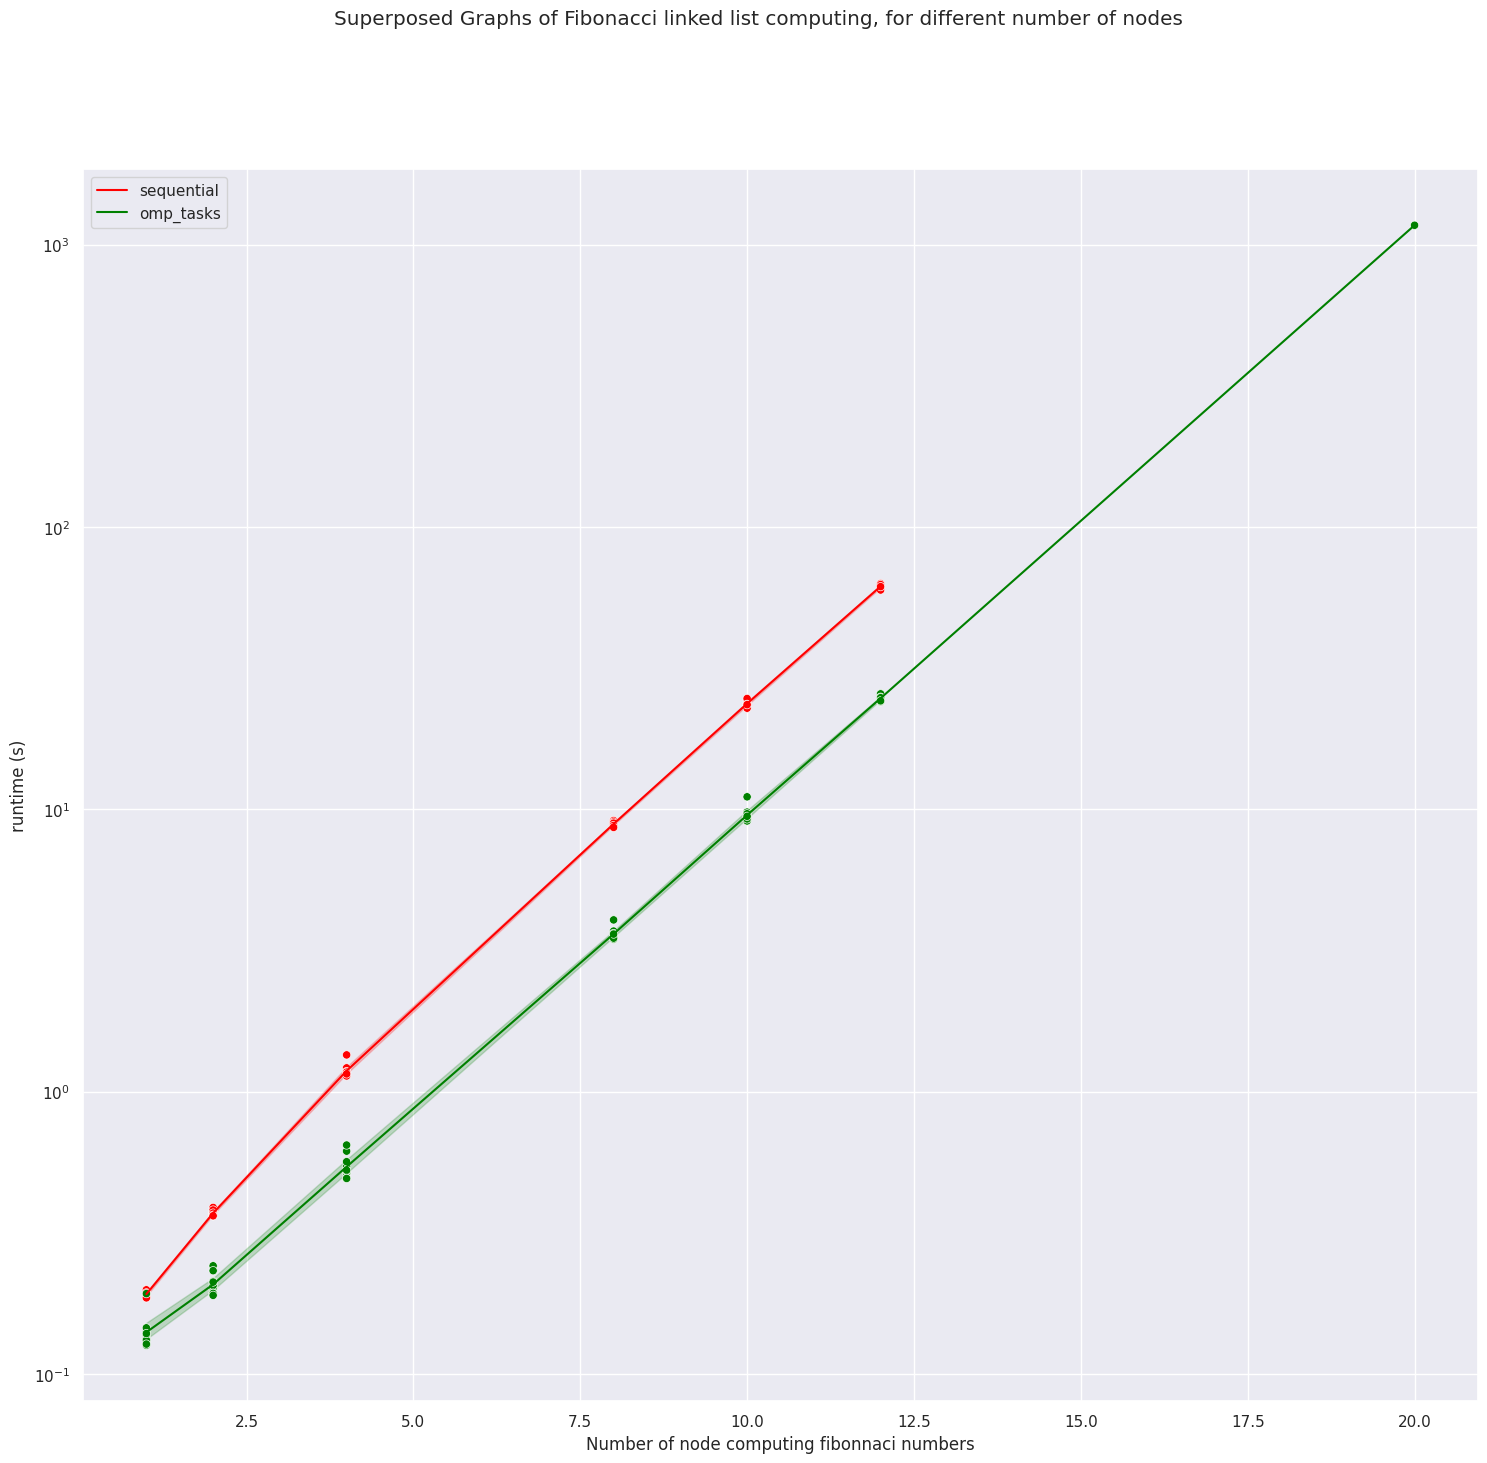

In [8]:
# superposed big graph
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from numpy import genfromtxt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()


df = pd.read_csv(
    csv_result_file,
    header=0, # line number of header
    dtype=csv_headers
)
display(df.head(10))

# filter out 0 runtime values
df = df[df.runtime > 0]

# display graphs
fig, ax = plt.subplots(figsize=(18,16))
fig.suptitle("Superposed Graphs of Fibonacci linked list computing, for different number of nodes")

for i in range(0, len(color_class.keys())):
    # print version graph data
    graph_version = list(color_class.keys())[i]
    df_plot_0 = df[df['version'] == graph_version]

    g0 = sns.lineplot(
        ax=ax,
        data=df_plot_0, 
        x="N",
        y="runtime", 
        hue="version",
        palette=color_class,
        style="version",
    )
    g0.set(yscale="log")
    g0.set(xlabel="Number of node computing fibonnaci numbers", ylabel="runtime (s)")
    g00 = sns.scatterplot(
        ax=ax,
        data=df_plot_0, 
        x="N",
        y="runtime", 
        hue="version",
        palette=color_class,
        legend=False,
    )
    g00.set(yscale="log")

plt.legend()
plt.show()

### Discussion

On constate que dans tous les cas, la version parallélisée utilisant les tasks omp est la plus rapide. C'est le résultat attendu.  
